# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** PCA implementation from scratch

</font>
</div>

# What is PCA?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- PCA stands for Principal Component Analysis.
- It’s an unsupervised learning algorithm with the purpose of dimensionality-reduction by transforming a large set of features into a smaller one, while preserving as much information as possible. 

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [16]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# Implementation
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- PCA consists mainly of three steps:
    - First of all, we need to compute the covariance matrix.
    - Once we obtain this matrix, we need to decompose it, using eigendecomposition.
    - Next, we can select the most important eigenvectors based on the eigenvalues, to finally project the original matrix into its reduced dimension.

</font>
</div>

In [3]:
class PCA:
    def fit_transform(self, X, n_components=2):
        """
        """
        # get number of samples and components
        self.n_samples = X.shape[0]
        self.n_components = n_components
        # standardize data
        self.A = self.standardize_data(X)
        # calculate covariance matrix
        covariance_matrix = self.get_covariance_matrix()
        # retrieve selected eigenvectors
        eigenvectors = self.get_eigenvectors(covariance_matrix)
        # project into lower dimension
        projected_matrix = self.project_matrix(eigenvectors)
        return projected_matrix

    def standardize_data(self, X):
        """
        We standardize the data by subtracting the mean and dividing by 
        the standard deviation. This transforms all features to the same 
        scale, allowing for equal contribution to the analysis. The 
        covariance matrix can be also computed using the NumPy function 
        numpy.cov(x).
        """
        # subtract mean and divide by standard deviation columnwise
        numerator = X - np.mean(X, axis=0)
        denominator = np.std(X, axis=0)
        return numerator / denominator

    def get_covariance_matrix(self, ddof=0):
        """Get covariace matrix
        
        The covariance matrix, loosely speaking, tells us how much two 
        random variables vary together. If the covariance is positive, 
        then the two variables are correlated, hence moving (increasing 
        or decreasing) in the same direction. If the covariance is negative,
        then the variables are inversely correlated, meaning they’re moving
        in the opposite direction (e.g. one is increasing while the other is 
        decreasing)
        """
        # calculate covariance matrix with standardized matrix A
        C = np.dot(self.A.T, self.A) / (self.n_samples-ddof)
        return C

    def get_eigenvectors(self, C):
        """
        Eigendecomposition describes the factorization of a matrix into 
        eigenvectors and eigenvalues. The eigenvectors provide us with 
        information about the direction of the data, whereas the eigenvalues 
        can be interpreted as coefficients, telling us how much variance is carried
        in each eigenvector.
        
        If we decompose our covariance matrix, we obtain the eigenvectors, which
        explain the most variance within our dataset. We can use those vectors 
        to project our original matrix into a lower dimension.
        """
        # calculate eigenvalues & eigenvectors of covariance matrix 'C'
        eigenvalues, eigenvectors = np.linalg.eig(C)
        # sort eigenvalues descending and select columns based on n_components
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_vectors = eigenvectors[:, n_cols]
        return selected_vectors

    def project_matrix(self, eigenvectors):
        """
        By selecting the most important eigenvectors, we are now able to project
        the original matrix into the lower-dimensional space. This is achieved by
        taking the dot product of the matrix and the eigenvectors, which also can
        be interpreted as a simple linear transformation.
        """
        P = np.dot(self.A, eigenvectors)
        return P

## Additional info covariance matrix

<div class="alert alert-info">
<font color=black>

- Let’s assume we have a dataset with three features. If we calculate the covariance matrix, we will get a 3x3 matrix, containing the covariance of each column with all the other columns and itself. 

</font>
</div>

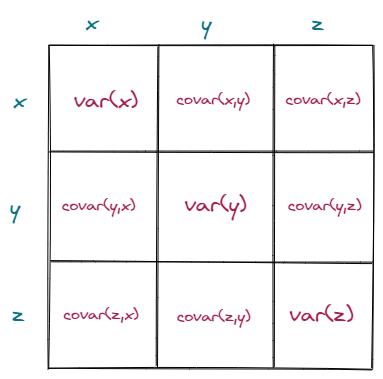

<div class="alert alert-info">
<font color=black>

- The formula for calculating the matrix can be stated as the following:

</font>
</div>

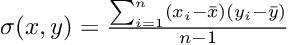

<div class="alert alert-info">
<font color=black>

- If we mean-center our data beforehand, we can omit the subtraction of ‘x-bar’ and ‘y-bar’ respectively. Simplifying our equation and expressing it in terms of linear algebra notation we get the following (which is simply the dot product of the mean-centered data matrix with itself divided by the number of samples.)

</font>
</div>

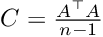

# Testing
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We will use the iris dataset, which consists of 150 samples with 4 different features (Sepal Length, Sepal Width, Petal Length, Petal Width). 
- Our goal is to predict the correct class among 3 different types of irises’.

</font>
</div>

In [10]:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
# instantiate and fit_transform PCA
pca = PCA()
X_pca = pca.fit_transform(X, n_components=2)

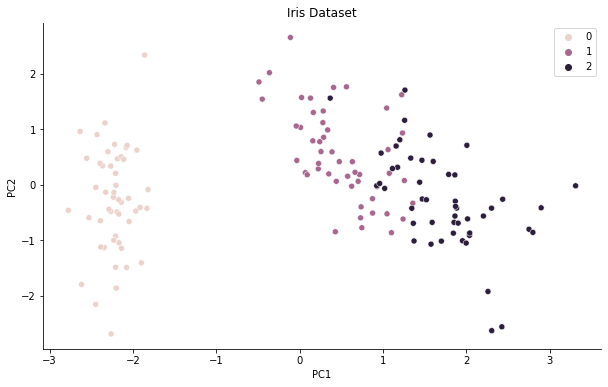

In [17]:
# plot results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y
)

ax.set_title('Iris Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

sns.despine()

<div class="alert alert-info">
<font color=black>

- By applying PCA, we clearly untangled some of the class relations and separated the data more clearly. 
- This lower-dimensional data structure should make a classification task **a lot easier**.

</font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- [Reference code](https://towardsdatascience.com/implementing-pca-from-scratch-fb434f1acbaa)

</font>
</div>